In [ ]:
!pip install simpleai
from simpleai.search import SearchProblem
from simpleai.search.traditional import astar, depth_first, breadth_first, greedy
import time

import numpy as np
import math
from matplotlib import pyplot as plt
mars_map = np.load('mars_map.npy')
nr, nc = mars_map.shape

In [ ]:
p0 = (6400, 2850)

p1 = (6800, 3150) #Original

# Parejas con distancia menor o igual a 500 metros:
#p1 = (6450, 3200)
#p1 = (6380, 3300)

# Parejas con distancia entre 1,000 metros y 5,000 metros: 
#p1 = (6500, 3500)
#p1 = (6900, 3400)

# Parejas con distancia mayor a 10,000 metros:
#p1 = (16030, 5555)
#p1 = (17000, 2850)

max_dif_h = 0.25
INIT_STATE = (nr-round(p0[0]/10.0174), round(p0[1]/10.0174))
GOAL = (nr-round(p1[0]/10.0174), round(p1[1]/10.0174))
print(INIT_STATE)
print(GOAL)

(1176, 285)
(1136, 314)


In [ ]:
class MarsRoverProblem(SearchProblem):
    def actions(self, state):
        h0 = mars_map[state[0],state[1]]
        list_actions = []

        for j in [-1,0,1]:
          for i in [-1,0,1]:
            if not (i == 0 and j == 0):
              h = mars_map[state[0]+i,state[1]+j]
              if abs(h-h0)<max_dif_h and h!=-1.0:
                list_actions.append([state[0]+i, state[1]+j])
        return list_actions

    def result(self, state, action):
        return tuple([action[0], action[1]])

    def is_goal(self, state):
        return state==GOAL

    def heuristic(self, state):
        # Distancias del punto actual al punto objetivo
        dt = math.sqrt((state[0]-GOAL[0])**2 + (state[1]-GOAL[1])**2)
        return dt

In [ ]:
my_problem = MarsRoverProblem(initial_state=INIT_STATE)
t1 = time.time()
result = astar(my_problem, graph_search=True)
#result = breadth_first(my_problem, graph_search=True)
#result = depth_first(my_problem, graph_search=True)
#result = greedy(my_problem, graph_search=True)
t2 = time.time()
print("Tiempo de procesamiento: ", t2-t1)

Tiempo de procesamiento:  1.9635887145996094


In [ ]:
# Convertimos a un arreglo de coordenadas X y Y.
rows = []
cols = []
for state in result.path():
    rows.append(state[1][0])
    cols.append(state[1][1])

distancia_recorrida = 0
for i in  range(len(rows)-1):
  distancia_recorrida += math.sqrt((rows[i+1]-rows[i])**2 + (cols[i+1]-cols[i])**2)
print(distancia_recorrida)

350.66399692442934


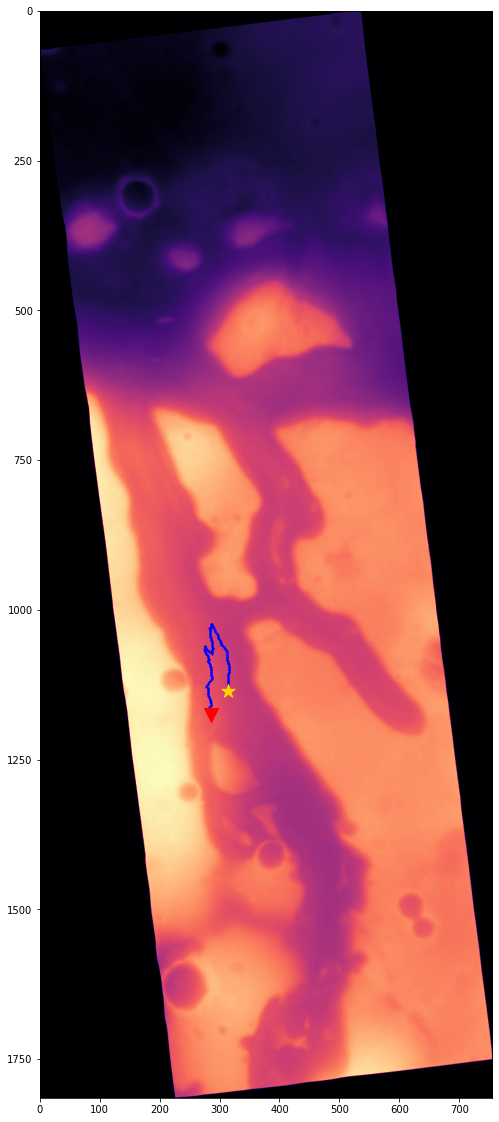

In [ ]:
fig = plt.figure(figsize=(20,20))
plt.imshow(mars_map, cmap='magma')
plt.scatter(cols, rows, c='blue', s=1)
plt.scatter([INIT_STATE[1]], [INIT_STATE[0]], c='red', marker='v', s=200)
plt.scatter([GOAL[1]], [GOAL[0]], c='gold', marker='*', s=200)
plt.show()